In [1]:
import numpy as np

In [2]:
# per-shot noise sampler (call once per signal/trial)
def sample_noise(amp_std=0.0, phase_std=0.0, detune_std=0.0):
    return {
        "amp_jitter": np.random.normal(0.0, amp_std),
        "phase_jitter": np.random.normal(0.0, phase_std),
        "detune": np.random.normal(0.0, detune_std)
    }

# noisy gaussian pulse wrapper (example)
def noisy_gauss(t, A=1.0, sigma=0.08, center=0.5, noise=None, freq=1.0):
    amp = A + (noise["amp_jitter"] if noise else 0.0)
    phase = (noise["phase_jitter"] if noise else 0.0)
    det = (noise["detune"] if noise else 0.0)
    # base envelope
    env = amp * np.exp(-((t-center)**2)/(2*sigma**2))
    # carrier with optional detune and phase
    return env * np.cos(2*np.pi*(freq+det)*t + phase)

In [3]:
import numpy as np

# original pulse function (example)
def pulse_gauss(t, A=1.0, sigma=0.08, center=0.5):
    return A * np.exp(-((t-center)**2)/(2*sigma**2))

# 1) Add Gaussian amplitude noise per trial
def noisy_pulse_gauss(t, A=1.0, sigma=0.08, center=0.5, amp_noise_std=0.02):
    noise = np.random.normal(0, amp_noise_std)   # per-trial amplitude jitter
    return (A + noise) * np.exp(-((t-center)**2)/(2*sigma**2))

# 2) Add phase noise (time-dependent)
def noisy_pulse_with_phase(t, A=1.0, sigma=0.08, center=0.5, phase_noise_std=0.1):
    phase_noise = np.random.normal(0, phase_noise_std)
    return A * np.exp(-((t-center)**2)/(2*sigma**2)) * np.cos(2*np.pi*(t)*1.0 + phase_noise)

BB84 State preperation

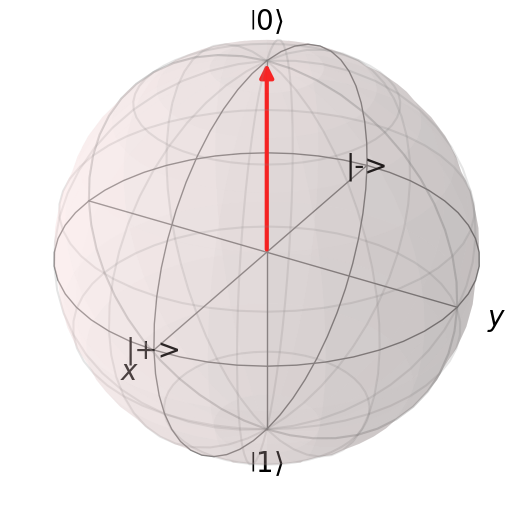

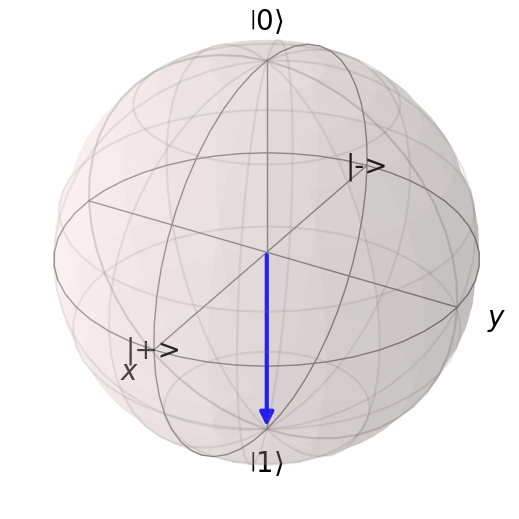

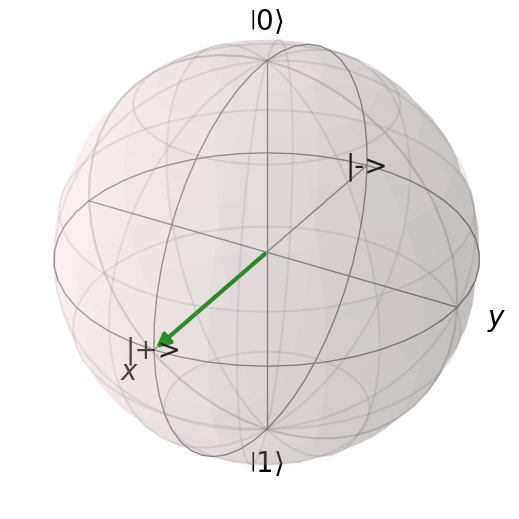

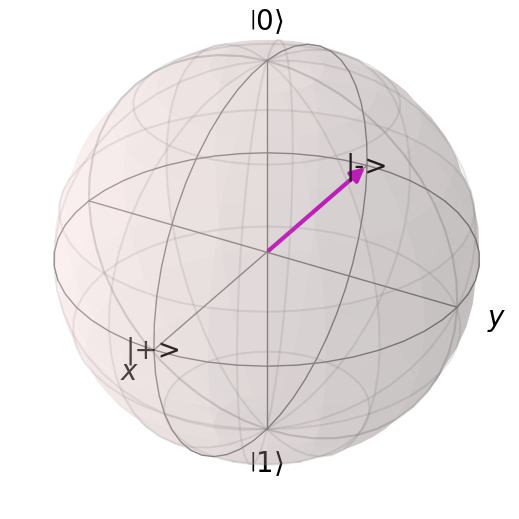

In [4]:
from qutip import Bloch, basis
import matplotlib.pyplot as plt

#Define states
zero = basis(2, 0)                       # |0>
one = basis(2, 1)                        # |1>
plus = (basis(2, 0) + basis(2, 1)).unit()    # |+>
minus = (basis(2, 0) - basis(2, 1)).unit()   # ||->

states = {
    "|0>": (zero, 'r'),    # red
    "|1>": (one, 'b'),     # blue
    "|+>": (plus, 'g'),    # green
    "|->": (minus, 'm')    # magenta
}

#Function to plot each state with its own color
def plot_state(state, label, color):
    b = Bloch()
    b.add_states(state)
    b.point_color = [color]
    b.vector_color = [color]
    b.add_annotation([1,0,0], "|+>")
    b.add_annotation([-1,0,0], "|->")
    b.add_annotation([0,1,0], "")
    b.add_annotation([0,-1,0], "")
    b.add_annotation([0,0,1], "")
    b.add_annotation([0,0,-1], "")
    b.title = f"Bloch Sphere: {label}"
    b.show()
    plt.show()

#Generate separate Bloch sphere images
for label, (state, color) in states.items():
    plot_state(state, label, color)

PULSE LEVEL ATTACKS ON BB84 STATE

c:\Users\USER\anaconda3\envs\qkd-crosstalk\lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


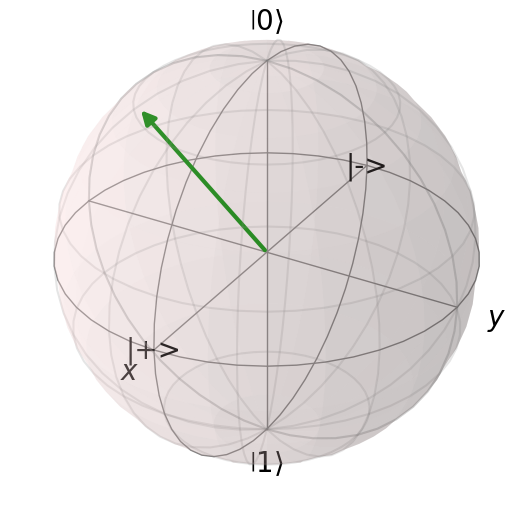

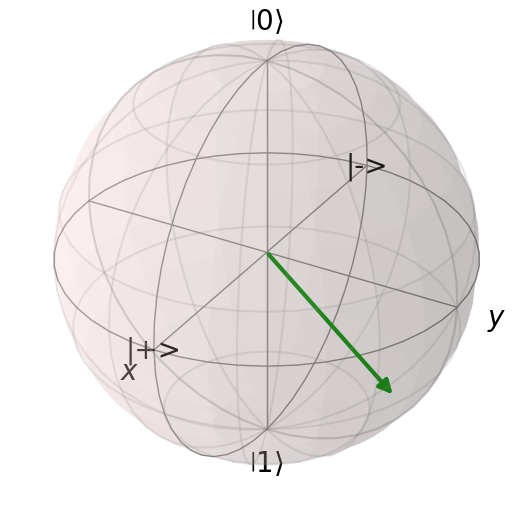

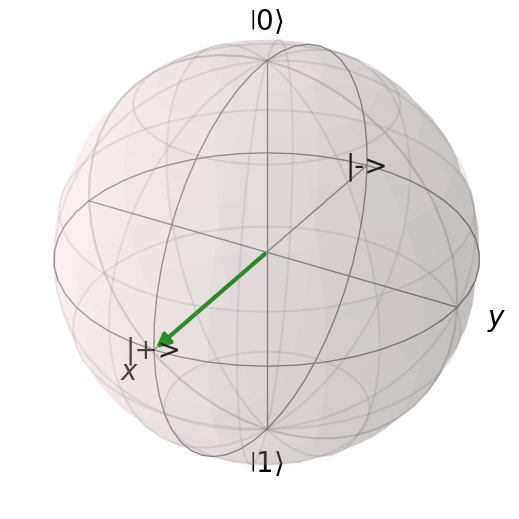

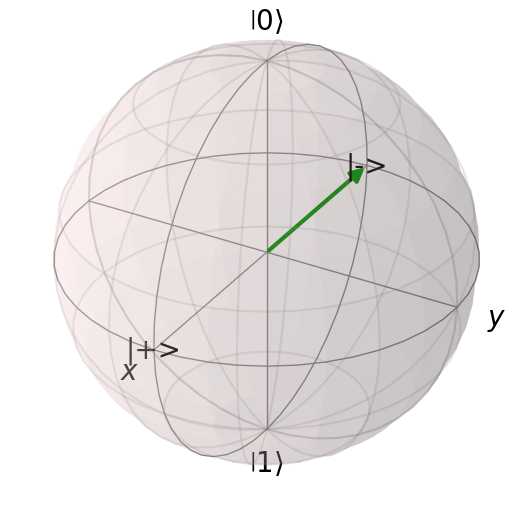

In [5]:
import numpy as np
from qutip import *

# Pauli operators
X, Y, Z, I = sigmax(), sigmay(), sigmaz(), qeye(2)

# Coupling strengths
J01, J12 = 0.5, 0.5
A0, A1 = 1.0, 1.0
sigma = 0.1  # Gaussian width

# Time list
tlist = np.linspace(0, 1, 100)

# Gaussian pulses
def f0(t, args): return np.exp(-((t-0.5)**2) / (2*sigma**2))
def f1(t, args): return np.exp(-((t-0.5)**2) / (2*sigma**2))

# Hamiltonian pieces
H_coupling = [
    tensor(Y, X, I),   # Y⊗X on q0,q1
    tensor(I, Z, X)    # Z⊗X on q1,q2
]

H_drive = [
    [tensor(X, I, I), f0],  # drive on q0
    [tensor(I, X, I), f1]   # drive on q1
]

H = [J01*H_coupling[0] + J12*H_coupling[1],
     [A0*tensor(X,I,I), f0],
     [A1*tensor(I,X,I), f1]]

# Alice’s BB84 states
zero = basis(2,0)
one  = basis(2,1)
plus = (basis(2,0)+basis(2,1)).unit()
minus= (basis(2,0)-basis(2,1)).unit()

alice_states = {"|0>": zero, "|1>": one, "|+>": plus, "|->": minus}

# Function to simulate evolution
def evolve_alice(initial_state):
    psi0 = tensor(basis(2,0), basis(2,0), initial_state)
    result = mesolve(H, psi0, tlist, [], [])
    final_state = result.states[-1]
    rho_alice = final_state.ptrace(2)  # trace out q0,q1
    return rho_alice

# Plot Bloch sphere for each state after attack
import numpy as np
from qutip import *

# Pauli operators
X, Y, Z, I = sigmax(), sigmay(), sigmaz(), qeye(2)

# Coupling strengths
J01, J12 = 0.5, 0.5
A0, A1 = 1.0, 1.0
sigma = 0.1  # Gaussian width

# Time list
tlist = np.linspace(0, 1, 100)

# Gaussian pulses
def f0(t, args): return np.exp(-((t-0.5)**2) / (2*sigma**2))
def f1(t, args): return np.exp(-((t-0.5)**2) / (2*sigma**2))

# Hamiltonian pieces
H_coupling = [
    tensor(Y, X, I),   # Y⊗X on q0,q1
    tensor(I, Z, X)    # Z⊗X on q1,q2
]

H_drive = [
    [tensor(X, I, I), f0],  # drive on q0
    [tensor(I, X, I), f1]   # drive on q1
]

H = [J01*H_coupling[0] + J12*H_coupling[1],
     [A0*tensor(X,I,I), f0],
     [A1*tensor(I,X,I), f1]]

# Alice’s BB84 states
zero = basis(2,0)
one  = basis(2,1)
plus = (basis(2,0)+basis(2,1)).unit()
minus= (basis(2,0)-basis(2,1)).unit()

alice_states = {"|0>": zero, "|1>": one, "|+>": plus, "|->": minus}

# Function to simulate evolution
def evolve_alice(initial_state):
    psi0 = tensor(basis(2,0), basis(2,0), initial_state)
    result = mesolve(H, psi0, tlist, [], [])
    final_state = result.states[-1]
    rho_alice = final_state.ptrace(2)  # trace out q0,q1
    return rho_alice

# Plot Bloch sphere for each state after attack
for label, init in alice_states.items():
    rho = evolve_alice(init)
    b = Bloch()
    b.add_states(rho)

    # Add only + and - X axis annotations
    b.add_annotation([1,0,0], "|+>")
    b.add_annotation([-1,0,0], "|->")

    b.title = f"Alice’s final state: {label}"
    b.show()

In [3]:
# Save as bb84_pulse_crosstalk.py and run with: python bb84_pulse_crosstalk.py
import numpy as np
import random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, mesolve, Bloch

# Pauli ops
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# Simulation parameters
n_steps = 50
tlist = np.linspace(0, 1, n_steps)

# Couplings (tuneable)
J01 = 1.0
J12 = 1.0

# Eve drive amplitudes
A0 = 1.0
A1 = 1.0

# Gaussian pulse
sigma = 0.08
def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# Coupling terms (3-qubit)
H_coup_01 = tensor(Y, X, qeye(2))
H_coup_12 = tensor(qeye(2), Z, X)

# Drive terms (time-dependent)
H_drive_0 = [tensor(X, qeye(2), qeye(2)), lambda t, args: A0 * gaussian(t)]
H_drive_1 = [tensor(qeye(2), X, qeye(2)), lambda t, args: A1 * gaussian(t)]

# Full H
H = [J01 * H_coup_01 + J12 * H_coup_12, H_drive_0, H_drive_1]

# BB84 states on q2
state_0 = basis(2,0)
state_1 = basis(2,1)
state_plus = (basis(2,0) + basis(2,1)).unit()
state_minus= (basis(2,0) - basis(2,1)).unit()
bb84 = {"|0>": state_0, "|1>": state_1, "|+>": state_plus, "|->": state_minus}

def evolve_three_qubit(state_q2):
    psi0 = tensor(basis(2,0), basis(2,0), state_q2)
    result = mesolve(H, psi0, tlist, [], [])
    final = result.states[-1]
    rho_q2 = final.ptrace(2)
    return rho_q2, final

def measure_rho(rho, basis_choice):
    if basis_choice == "Z":
        P0 = state_0 * state_0.dag()
        p0 = np.real((P0 * rho).tr())
        return 0 if random.random() < p0 else 1
    else:
        Pp = state_plus * state_plus.dag()
        p_plus = np.real((Pp * rho).tr())
        return 0 if random.random() < p_plus else 1

# Evaluate per-state fidelities and Bloch vectors
for label, psi in bb84.items():
    rho_q2, final = evolve_three_qubit(psi)
    # FIX: no [0,0] indexing
    fidelity = np.real((psi.dag() * rho_q2 * psi))
    bx = np.real((rho_q2 * X).tr())
    by = np.real((rho_q2 * Y).tr())
    bz = np.real((rho_q2 * Z).tr())
    print(f"{label}: fidelity={fidelity:.6f}, Bloch=[{bx:.4f},{by:.4f},{bz:.4f}]")


# BB84 simulation
def run_bb84(N=200, seed=42):
    random.seed(seed)
    alice_bits = []; alice_bases = []
    bob_bits = []; bob_bases = []
    for _ in range(N):
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)
        if basis_choice == "Z":
            psi = state_0 if bit==0 else state_1
        else:
            psi = state_plus if bit==0 else state_minus
        rho_q2, _ = evolve_three_qubit(psi)  #pulse is injected on alice's qubits
        bob_basis = random.choice(["Z","X"])
        bob_bases.append(bob_basis)
        bob_bits.append(measure_rho(rho_q2, bob_basis))
    common = [i for i in range(N) if alice_bases[i] == bob_bases[i]]
    sift_alice = [alice_bits[i] for i in common]
    sift_bob   = [bob_bits[i]   for i in common]
    mismatches = sum(a!=b for a,b in zip(sift_alice, sift_bob))
    qber = mismatches / len(sift_alice) if sift_alice else 0.0
    return qber, sift_alice, sift_bob

print("\nRunning BB84 with pulses (this will take a short while due to mesolve)...")
qber, a_key, b_key = run_bb84(N=200, seed=42)
print("QBER =", qber)
print("Example sifted pairs (first 20):")
for i,(a,b) in enumerate(zip(a_key[:20], b_key[:20])):
    print(i,a,b,"✓" if a==b else "✗")


|0>: fidelity=0.494934, Bloch=[0.0000,-0.2843,-0.0101]
|1>: fidelity=0.494934, Bloch=[0.0000,0.2843,0.0101]
|+>: fidelity=1.000000, Bloch=[1.0000,0.0000,0.0000]
|->: fidelity=1.000000, Bloch=[-1.0000,0.0000,0.0000]

Running BB84 with pulses (this will take a short while due to mesolve)...
QBER = 0.2777777777777778
Example sifted pairs (first 20):
0 0 1 ✗
1 0 0 ✓
2 1 1 ✓
3 1 0 ✗
4 1 1 ✓
5 1 1 ✓
6 0 0 ✓
7 0 0 ✓
8 0 1 ✗
9 0 0 ✓
10 1 1 ✓
11 1 0 ✗
12 0 0 ✓
13 0 1 ✗
14 0 1 ✗
15 0 0 ✓
16 0 0 ✓
17 1 1 ✓
18 0 0 ✓
19 0 1 ✗


Uing different state on bb84 with pulse to see QBER

N=100, sifted=52, QBER=0.3462
N=250, sifted=134, QBER=0.2761
N=500, sifted=266, QBER=0.2519
N=700, sifted=369, QBER=0.2575


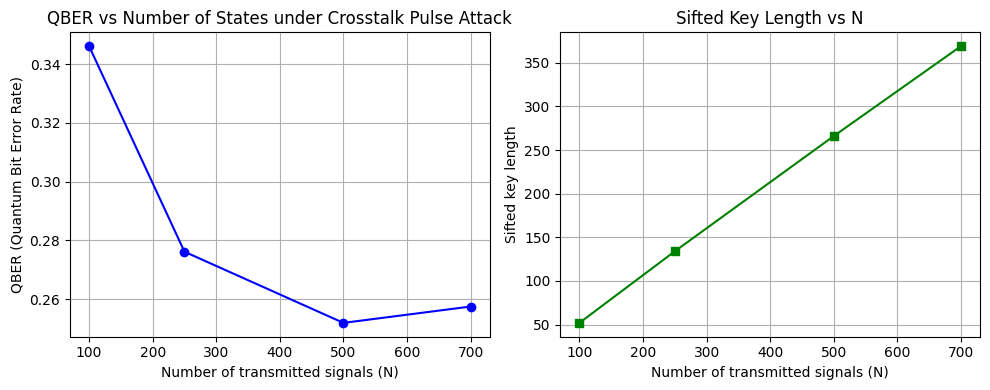

In [6]:
# Save as bb84_qber_sifted.py and run: python bb84_qber_sifted.py
import numpy as np
import random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, mesolve

# -----------------------------
# Pauli operators
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# Simulation parameters
n_steps = 50
tlist = np.linspace(0, 1, n_steps)

# Crosstalk coupling strengths
J01 = 1.0
J12 = 1.0

# Eve drive amplitudes
A0 = 1.0
A1 = 1.0

# Gaussian pulse envelope
sigma = 0.08
def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# Hamiltonian terms (3-qubit system: q0=Eve, q1=Eve, q2=Alice)
H_coup_01 = tensor(Y, X, I)       # Y⊗X coupling q0-q1
H_coup_12 = tensor(I, Z, X)       # Z⊗X coupling q1-q2

H_drive_0 = [tensor(X, I, I), lambda t, args: A0 * gaussian(t)]  # Eve pulse on q0
H_drive_1 = [tensor(I, X, I), lambda t, args: A1 * gaussian(t)]  # Eve pulse on q1

# Full Hamiltonian with coupling + drives
H = [J01 * H_coup_01 + J12 * H_coup_12, H_drive_0, H_drive_1]

# -----------------------------
# Alice’s BB84 states (on q2)
state_0 = basis(2,0)
state_1 = basis(2,1)
state_plus = (basis(2,0) + basis(2,1)).unit()
state_minus= (basis(2,0) - basis(2,1)).unit()

def evolve_three_qubit(state_q2):
    """Evolve 3-qubit system and return reduced density matrix of Alice's qubit q2."""
    psi0 = tensor(basis(2,0), basis(2,0), state_q2)  # start q0,q1 in |0>, Alice in given state
    result = mesolve(H, psi0, tlist, [], [])
    final = result.states[-1]
    rho_q2 = final.ptrace(2)  # reduced state of Alice's qubit
    return rho_q2

def measure_rho(rho, basis_choice):
    """Simulate Bob’s projective measurement in chosen basis."""
    if basis_choice == "Z":
        P0 = state_0 * state_0.dag()
        p0 = np.real((P0 * rho).tr())
        return 0 if random.random() < p0 else 1
    else:  # X basis
        Pp = state_plus * state_plus.dag()
        p_plus = np.real((Pp * rho).tr())
        return 0 if random.random() < p_plus else 1

def run_bb84(N=200, seed=42):
    """Run BB84 with N transmitted qubits under crosstalk attack."""
    random.seed(seed)
    alice_bits, alice_bases = [], []
    bob_bits, bob_bases = [], []

    for _ in range(N):
        # Alice randomly encodes
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)
        if basis_choice == "Z":
            psi = state_0 if bit==0 else state_1
        else:
            psi = state_plus if bit==0 else state_minus

        # Evolve under Eve’s attack pulses
        rho_q2 = evolve_three_qubit(psi)

        # Bob randomly measures
        bob_basis = random.choice(["Z","X"])
        bob_bases.append(bob_basis)
        bob_bits.append(measure_rho(rho_q2, bob_basis))

    # Basis reconciliation
    common = [i for i in range(N) if alice_bases[i] == bob_bases[i]]
    sift_alice = [alice_bits[i] for i in common]
    sift_bob   = [bob_bits[i]   for i in common]

    mismatches = sum(a!=b for a,b in zip(sift_alice, sift_bob))
    qber = mismatches / len(sift_alice) if sift_alice else 0.0
    return qber, len(sift_alice)

# -----------------------------
# Run for different N values
N_values = [100, 250, 500, 700]
qbers = []
sift_lengths = []

for N in N_values:
    qber, sift_len = run_bb84(N=N, seed=42)
    qbers.append(qber)
    sift_lengths.append(sift_len)
    print(f"N={N}, sifted={sift_len}, QBER={qber:.4f}")

# -----------------------------
# Plot QBER vs N
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(N_values, qbers, marker='o', linestyle='-', color='b')
plt.xlabel("Number of transmitted signals (N)")
plt.ylabel("QBER (Quantum Bit Error Rate)")
plt.title("QBER vs Number of States under Crosstalk Pulse Attack")
plt.grid(True)

# Plot sifted key length vs N
plt.subplot(1,2,2)
plt.plot(N_values, sift_lengths, marker='s', linestyle='-', color='g')
plt.xlabel("Number of transmitted signals (N)")
plt.ylabel("Sifted key length")
plt.title("Sifted Key Length vs N")
plt.grid(True)

plt.tight_layout()
plt.show()

Parameter effect on different pulses

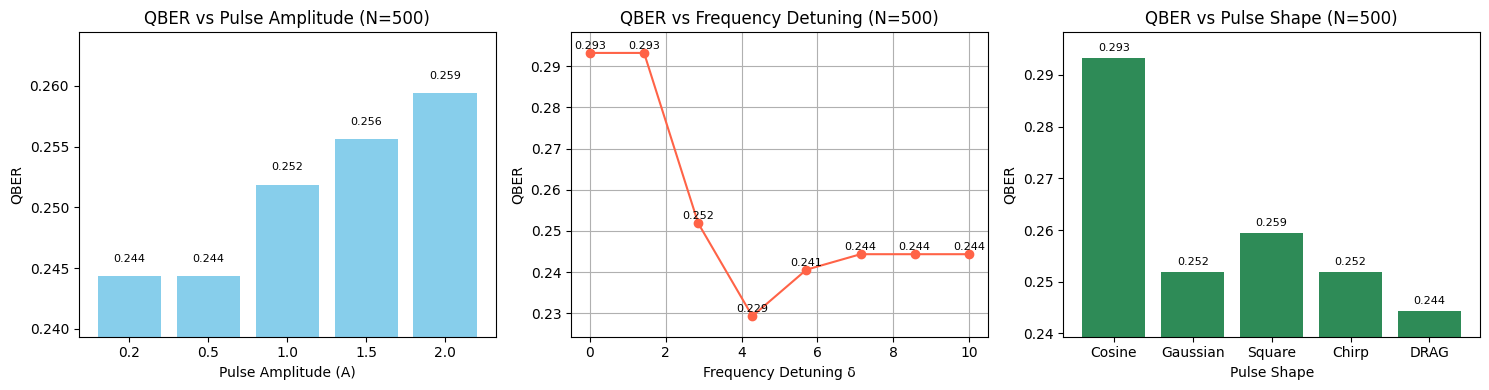

In [7]:
# Save as bb84_pulse_params.py and run: python bb84_pulse_params.py
import numpy as np
import random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, mesolve

# -----------------------------
# Pauli operators
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# Time evolution setup
n_steps = 50
tlist = np.linspace(0, 1, n_steps)

# Crosstalk couplings
J01, J12 = 1.0, 1.0

# -----------------------------
# BB84 states on Alice’s qubit (q2)
state_0 = basis(2,0)
state_1 = basis(2,1)
state_plus  = (basis(2,0) + basis(2,1)).unit()
state_minus = (basis(2,0) - basis(2,1)).unit()

# -----------------------------
# Pulse shapes
def pulse_cosine(t, A=1.0, delta=0.0, **kwargs):
    return A * np.cos(delta * t)

def pulse_gaussian(t, A=1.0, sigma=0.08, **kwargs):
    return A * np.exp(-((t-0.5)**2) / (2*sigma**2))

def pulse_square(t, A=1.0, **kwargs):
    return A if 0.3 <= t <= 0.7 else 0.0

def pulse_chirp(t, A=1.0, delta=0.0, c=5.0, **kwargs):
    return A * np.cos((delta + c*t) * t)

def pulse_drag(t, A=1.0, sigma=0.08, alpha=2.0, **kwargs):
    return A * np.exp(-((t-0.5)**2) / (2*sigma**2) - alpha*((t-0.5)**2)/(sigma**2))

pulse_shapes = {
    "Cosine": pulse_cosine,
    "Gaussian": pulse_gaussian,
    "Square": pulse_square,
    "Chirp": pulse_chirp,
    "DRAG": pulse_drag
}

# -----------------------------
def evolve_three_qubit(state_q2, pulse_func, A=1.0, delta=0.0):
    """Evolve Alice’s state under Eve’s crosstalk pulses."""
    # Couplings: Y⊗X on q0,q1 and Z⊗X on q1,q2
    H_coup_01 = tensor(Y, X, I)
    H_coup_12 = tensor(I, Z, X)

    # Drives (time-dependent)
    H_drive_0 = [tensor(X, I, I), lambda t, args: pulse_func(t, A=A, delta=delta)]
    H_drive_1 = [tensor(I, X, I), lambda t, args: pulse_func(t, A=A, delta=delta)]

    H = [J01*H_coup_01 + J12*H_coup_12, H_drive_0, H_drive_1]

    psi0 = tensor(basis(2,0), basis(2,0), state_q2)
    result = mesolve(H, psi0, tlist, [], [])
    return result.states[-1].ptrace(2)

def measure_rho(rho, basis_choice):
    """Projective measurement on Alice’s qubit in Z/X basis."""
    if basis_choice == "Z":
        P0 = state_0 * state_0.dag()
        p0 = np.real((P0 * rho).tr())
        return 0 if random.random() < p0 else 1
    else:
        Pp = state_plus * state_plus.dag()
        p_plus = np.real((Pp * rho).tr())
        return 0 if random.random() < p_plus else 1

def run_bb84(N=500, pulse_func=pulse_gaussian, A=1.0, delta=0.0, seed=42):
    random.seed(seed)
    alice_bits, alice_bases = [], []
    bob_bits, bob_bases = [], []

    for _ in range(N):
        # Alice encodes
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)
        psi = state_0 if (basis_choice=="Z" and bit==0) else \
              state_1 if (basis_choice=="Z" and bit==1) else \
              state_plus if (basis_choice=="X" and bit==0) else state_minus

        # Evolution under attack
        rho_q2 = evolve_three_qubit(psi, pulse_func, A=A, delta=delta)

        # Bob measures
        bob_basis = random.choice(["Z","X"])
        bob_bases.append(bob_basis)
        bob_bits.append(measure_rho(rho_q2, bob_basis))

    # Sifting
    common = [i for i in range(N) if alice_bases[i] == bob_bases[i]]
    sift_a = [alice_bits[i] for i in common]
    sift_b = [bob_bits[i]   for i in common]
    mismatches = sum(a!=b for a,b in zip(sift_a, sift_b))
    qber = mismatches / len(sift_a) if sift_a else 0.0
    return qber

# -----------------------------
# 1. QBER vs Pulse Amplitude
A_values = [0.2, 0.5, 1.0, 1.5, 2.0]
qber_vs_amp = [run_bb84(N=500, pulse_func=pulse_gaussian, A=A) for A in A_values]

# 2. QBER vs Frequency Detuning
delta_values = np.linspace(0, 10, 8)
qber_vs_delta = [run_bb84(N=500, pulse_func=pulse_cosine, delta=d) for d in delta_values]

# 3. QBER vs Pulse Shape
qber_vs_shape = {name: run_bb84(N=500, pulse_func=func) for name,func in pulse_shapes.items()}

# -----------------------------
# Plotting with zoomed-in precision
plt.figure(figsize=(15,4))

# QBER vs Amplitude
plt.subplot(1,3,1)
bars = plt.bar([str(a) for a in A_values], qber_vs_amp, color="skyblue")
plt.xlabel("Pulse Amplitude (A)")
plt.ylabel("QBER")
plt.title("QBER vs Pulse Amplitude (N=500)")
plt.ylim(min(qber_vs_amp)-0.005, max(qber_vs_amp)+0.005)  # zoom y-axis
for bar, val in zip(bars, qber_vs_amp):
    plt.text(bar.get_x()+bar.get_width()/2, val+0.001,
             f"{val:.3f}", ha='center', va='bottom', fontsize=8)

# QBER vs Detuning
plt.subplot(1,3,2)
plt.plot(delta_values, qber_vs_delta, marker='o', color="tomato")
plt.xlabel("Frequency Detuning δ")
plt.ylabel("QBER")
plt.title("QBER vs Frequency Detuning (N=500)")
plt.ylim(min(qber_vs_delta)-0.005, max(qber_vs_delta)+0.005)
for x,y in zip(delta_values, qber_vs_delta):
    plt.text(x, y+0.001, f"{y:.3f}", ha='center', fontsize=8)
plt.grid(True)

# QBER vs Shape
plt.subplot(1,3,3)
bars = plt.bar(list(qber_vs_shape.keys()), list(qber_vs_shape.values()), color="seagreen")
plt.xlabel("Pulse Shape")
plt.ylabel("QBER")
plt.title("QBER vs Pulse Shape (N=500)")
plt.ylim(min(qber_vs_shape.values())-0.005, max(qber_vs_shape.values())+0.005)
for bar, val in zip(bars, qber_vs_shape.values()):
    plt.text(bar.get_x()+bar.get_width()/2, val+0.001,
             f"{val:.3f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

GHZ STATE BLOcH SPHERE

Mermin correlators BEFORE attack:
  <XXX>: 1.000000
  <XYY>: -1.000000
  <YXY>: -1.000000
  <YYX>: -1.000000

Mermin correlators AFTER attack:
  <XXX>: -0.880749
  <XYY>: -0.922631
  <YXY>: -0.922631
  <YYX>: 0.880264


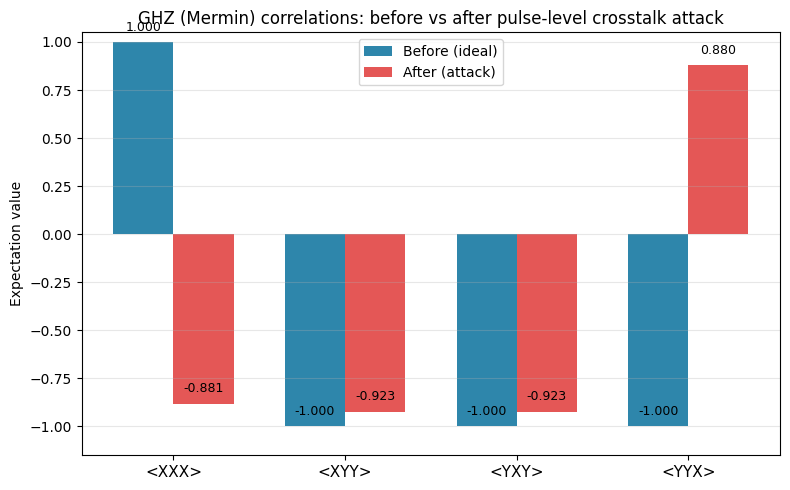


Summary (after - before):
  <XXX>: -1.880749
  <XYY>: +0.077369
  <YXY>: +0.077369
  <YYX>: +1.880264


In [6]:
# ghz_mermin_attack.py
import numpy as np
import matplotlib.pyplot as plt
from qutip import (
    basis, tensor, sigmax, sigmay, sigmaz, qeye, Qobj, mesolve
)

# ----------------------------
# Basic operators
X = sigmax()
Y = sigmay()
Z = sigmaz()
I = qeye(2)

# ----------------------------
# Utility: build Hadamard and CNOT (for N=3)
def hadamard_qobj():
    H_mat = np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)
    return Qobj(H_mat)

def cnot(control, target, N=3):
    """
    Construct a CNOT (control -> target) on N qubits (N=3 used here).
    Returns a Qobj operator.
    """
    # projector onto |0><0| on control and identity elsewhere
    P0_list = []
    for n in range(N):
        if n == control:
            P0_list.append(basis(2, 0) * basis(2, 0).dag())
        else:
            P0_list.append(qeye(2))
    P0 = tensor(*P0_list)

    # projector onto |1><1| on control and X on target, identity elsewhere to make GHZ state
    P1X_list = []
    for n in range(N):
        if n == control:
            P1X_list.append(basis(2, 1) * basis(2, 1).dag())
        elif n == target:
            P1X_list.append(sigmax())
        else:
            P1X_list.append(qeye(2))
    P1X = tensor(*P1X_list)

    return P0 + P1X

# ----------------------------
# Build GHZ state on 3 qubits: |000> -> (|000> + |111>)/sqrt(2)
def make_ghz():
    psi0 = tensor(basis(2,0), basis(2,0), basis(2,0))
    H1 = tensor(hadamard_qobj(), I, I)   # H on qubit-0 (Alice)
    CNOT01 = cnot(0, 1, N=3)             # control 0 -> target 1 (Alice->Bob)
    CNOT02 = cnot(0, 2, N=3)             # control 0 -> target 2 (Alice->Charlie)
    psi_ghz = CNOT02 * CNOT01 * H1 * psi0
    return psi_ghz

# ----------------------------
# Pulse/crosstalk Hamiltonian (paper model)
# H(t) = H_coupling + H_drive(t)
# coupling: J01 * (Y_0 ⊗ X_1 ⊗ I) + J12 * (I ⊗ Z_1 ⊗ X_2)
# drives: A0 f0(t) X_0 and A1 f1(t) X_1  (Gaussian pulses)

# parameters
J01 = 1.0
J12 = 1.0
A0 = 1.0
A1 = 1.0
sigma = 0.08
n_steps = 50
tlist = np.linspace(0.0, 1.0, n_steps)

def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# static coupling operators (3-qubit)
H_coup_01 = tensor(Y, X, I)   # Y_0 ⊗ X_1 ⊗ I_2
H_coup_12 = tensor(I, Z, X)   # I_0 ⊗ Z_1 ⊗ X_2

# build time-dependent Hamiltonian list for mesolve
H_static = J01 * H_coup_01 + J12 * H_coup_12
H_drive_0 = [tensor(X, I, I), lambda t, args: A0 * gaussian(t)]
H_drive_1 = [tensor(I, X, I), lambda t, args: A1 * gaussian(t)]
H_list = [H_static, H_drive_0, H_drive_1]

# ----------------------------
# Mermin correlators (operators)
OP_XXX = tensor(X, X, X)
OP_XYY = tensor(X, Y, Y)
OP_YXY = tensor(Y, X, Y)
OP_YYX = tensor(Y, Y, X)

def correlator(rho, op):
    # returns real expectation value Tr(rho op)
    return float((rho * op).tr().real)

def mermin_table(rho):
    return {
        "<XXX>": correlator(rho, OP_XXX),
        "<XYY>": correlator(rho, OP_XYY),
        "<YXY>": correlator(rho, OP_YXY),
        "<YYX>": correlator(rho, OP_YYX),
    }

# ----------------------------
# Prepare GHZ, show correlators before attack
psi_ghz = make_ghz()
rho_before = psi_ghz * psi_ghz.dag()
vals_before = mermin_table(rho_before)

print("Mermin correlators BEFORE attack:")
for k, v in vals_before.items():
    print(f"  {k}: {v:.6f}")

# ----------------------------
# Evolve under attack (mesolve)
result = mesolve(H_list, psi_ghz, tlist, [], [])
psi_after = result.states[-1]
rho_after = psi_after * psi_after.dag()
vals_after = mermin_table(rho_after)

print("\nMermin correlators AFTER attack:")
for k, v in vals_after.items():
    print(f"  {k}: {v:.6f}")

# ----------------------------
# Pretty bar plot: before vs after
labels = list(vals_before.keys())
before_vals = [vals_before[l] for l in labels]
after_vals  = [vals_after[l]  for l in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, before_vals, width, label='Before (ideal)', color='#2E86AB')
bars2 = ax.bar(x + width/2, after_vals,  width, label='After (attack)', color='#E45756')

# annotate numeric values
def annotate(bars):
    for bar in bars:
        h = bar.get_height()
        ax.annotate(f"{h:.3f}",
                    xy=(bar.get_x() + bar.get_width() / 2, h),
                    xytext=(0, 6), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

annotate(bars1)
annotate(bars2)

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_ylim(min(min(before_vals), min(after_vals)) - 0.15, 1.05)  # zoom a bit, keep room for annotations
ax.set_ylabel("Expectation value")
ax.set_title("GHZ (Mermin) correlations: before vs after pulse-level crosstalk attack")
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------
# Optional: print summary differences
print("\nSummary (after - before):")
for k in labels:
    print(f"  {k}: {vals_after[k] - vals_before[k]:+.6f}")

Pulse level attack on GHZ Protocol

In [7]:
# ghz_shifted_key_qutip.py
import numpy as np
import random
from qutip import (
    basis, tensor, sigmax, sigmay, sigmaz, qeye, Qobj, mesolve
)

# ---------------------------
# Basic operators & helpers
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

def hadamard_qobj():
    H_mat = np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)
    return Qobj(H_mat)

def cnot(control, target, N=3):
    # Build CNOT on N qubits (control -> target)
    P0_list = []
    for n in range(N):
        if n == control:
            P0_list.append(basis(2, 0) * basis(2, 0).dag())
        else:
            P0_list.append(qeye(2))
    P0 = tensor(*P0_list)
    P1X_list = []
    for n in range(N):
        if n == control:
            P1X_list.append(basis(2, 1) * basis(2, 1).dag())
        elif n == target:
            P1X_list.append(sigmax())
        else:
            P1X_list.append(qeye(2))
    P1X = tensor(*P1X_list)
    return P0 + P1X

# ---------------------------
# GHZ creation
def make_ghz_state():
    psi0 = tensor(basis(2,0), basis(2,0), basis(2,0))
    H0 = tensor(hadamard_qobj(), I, I)    # H on q0 (Alice)
    C01 = cnot(0, 1, N=3)
    C02 = cnot(0, 2, N=3)
    psi_ghz = C02 * C01 * H0 * psi0
    return psi_ghz

# ---------------------------
# Attack & evolution parameters (paper-style)
J01 = 1.0    # Y_0 ⊗ X_1 coupling
J12 = 1.0    # I_0 ⊗ Z_1 ⊗ X_2 coupling
A0 = 1.0     # attack amplitude on Alice's qubit q0
sigma = 0.08 # gaussian width
n_steps = 50
tlist = np.linspace(0.0, 1.0, n_steps)

def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# Build static coupling ops
H_coup_01 = tensor(Y, X, I)   # Y_0 ⊗ X_1 ⊗ I_2
H_coup_12 = tensor(I, Z, X)   # I_0 ⊗ Z_1 ⊗ X_2
H_static = J01 * H_coup_01 + J12 * H_coup_12

# Attack drive (applied on Alice's qubit q0 only)
H_drive_alice = [tensor(X, I, I), lambda t, args: A0 * gaussian(t)]

# Full Hamiltonian used for attack evolution (static + drive)
H_attack = [H_static, H_drive_alice]

# Hamiltonian for no-attack (just static couplings OR optionally zeroed)
H_noattack = [H_static]  # if you want zero couplings in the baseline, replace with []

# ---------------------------
# Measurement basis transforms
# For measuring in:
#  - Z basis: do nothing before computational-basis measurement
#  - X basis: apply H
#  - Y basis: apply Sdg then H  (Sdg = phase^-1)
Sdg = Qobj(np.array([[1, 0],[0, -1j]], dtype=complex))  # S^\dagger
H1 = hadamard_qobj()

def basis_rotation_ops(basis_triple):
    """Return U = U0 ⊗ U1 ⊗ U2 to rotate chosen bases to computational basis."""
    ops = []
    for b in basis_triple:
        if b == 'Z':
            ops.append(qeye(2))
        elif b == 'X':
            ops.append(H1)
        elif b == 'Y':
            ops.append(H1 * Sdg)   # Sdg then H rotates Y -> Z
        else:
            raise ValueError("basis must be 'X','Y', or 'Z'")
    return tensor(*ops)

# ---------------------------
# Helper: get computational-outcome probabilities from state rho (3-qubit)
computational_states = [tensor(basis(2,i), basis(2,j), basis(2,k)) for i in [0,1] for j in [0,1] for k in [0,1]]
proj_3qb = [ (s * s.dag()) for s in computational_states ]

def comp_probs_from_rho(rho):
    """Return list of 8 probabilities in lexicographic order '000'..'111'."""
    return np.array([float((rho * P).tr().real) for P in proj_3qb])

# ---------------------------
# Single experiment run: uses correlated sampling for no-attack and attack
def run_ghz_trials(N_trials=200, seed=None):
    """Run N_trials; return two sifted keys (no_attack_key, attack_key) and stats."""
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    psi_ghz = make_ghz_state()
    no_attack_key = []
    attack_key = []

    for _ in range(N_trials):
        # random bases for Alice, Bob, Charlie (only X or Y used in GHZ parity test)
        bases = (random.choice(['X','Y']), random.choice(['X','Y']), random.choice(['X','Y']))

        # Evolve under no-attack and attack, then rotate into measurement bases and get probs
        # No-attack evolution:
        res_no = mesolve(H_noattack, psi_ghz, tlist, [], [])
        psi_no = res_no.states[-1]
        Urot = basis_rotation_ops(bases)
        rho_no_rot = (Urot * psi_no) * (Urot * psi_no).dag()
        probs_no = comp_probs_from_rho(rho_no_rot)  # length-8 array

        # Attack evolution:
        res_att = mesolve(H_attack, psi_ghz, tlist, [], [])
        psi_att = res_att.states[-1]
        rho_att_rot = (Urot * psi_att) * (Urot * psi_att).dag()
        probs_att = comp_probs_from_rho(rho_att_rot)

        # correlated sampling: draw r in [0,1) and select outcome index from each distribution using same r
        r = random.random()
        # choose outcome index by cumulative sums
        cum_no = np.cumsum(probs_no)
        cum_att = np.cumsum(probs_att)
        idx_no = int(np.searchsorted(cum_no, r))
        idx_att = int(np.searchsorted(cum_att, r))
        # map index to bitstring 'abc' (a=Alice, b=Bob, c=Charlie) — order matches computational_states order
        # computational_states list was created in lexicographic order: i (Alice) fastest? we built tensor(basis(i),basis(j),basis(k))
        # so index 0 -> 000, 1 -> 001? To be explicit, compute bits as:
        a_no = (idx_no >> 2) & 1  # Alice is most significant bit
        b_no = (idx_no >> 1) & 1
        c_no = (idx_no >> 0) & 1
        a_att = (idx_att >> 2) & 1
        b_att = (idx_att >> 1) & 1
        c_att = (idx_att >> 0) & 1

        # Sifting rule: keep key bit only when all three measured in Y-basis AND parity == 1
        if bases == ('Y','Y','Y'):
            xor_no = a_no ^ b_no ^ c_no
            xor_att = a_att ^ b_att ^ c_att
            if xor_no == 1:
                no_attack_key.append(a_no)
            if xor_att == 1:
                attack_key.append(a_att)
        # otherwise no key bit this trial

    # Align keys by truncating to the shorter length and compute mismatches
    L = min(len(no_attack_key), len(attack_key))
    if L == 0:
        mismatch_count = None
        mismatch_rate = None
    else:
        mismatches = sum(1 for i in range(L) if no_attack_key[i] != attack_key[i])
        mismatch_count = mismatches
        mismatch_rate = mismatches / L

    stats = {
        "N_trials": N_trials,
        "no_attack_key_len": len(no_attack_key),
        "attack_key_len": len(attack_key),
        "aligned_key_len": L,
        "mismatch_count": mismatch_count,
        "mismatch_rate": mismatch_rate
    }
    return no_attack_key, attack_key, stats

# ---------------------------
# Run for requested N values
Ns = [100, 250, 500, 700]
all_stats = []
for N in Ns:
    print(f"Running N={N} trials ...")
    no_k, att_k, st = run_ghz_trials(N_trials=N, seed=42)
    all_stats.append(st)
    print(st)

# Final summary
print("\nSummary for all N:")
for st in all_stats:
    print(st)

Running N=100 trials ...


c:\Users\USER\anaconda3\envs\qkd-crosstalk\lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


{'N_trials': 100, 'no_attack_key_len': 5, 'attack_key_len': 3, 'aligned_key_len': 3, 'mismatch_count': 0, 'mismatch_rate': 0.0}
Running N=250 trials ...
{'N_trials': 250, 'no_attack_key_len': 22, 'attack_key_len': 16, 'aligned_key_len': 16, 'mismatch_count': 8, 'mismatch_rate': 0.5}
Running N=500 trials ...
{'N_trials': 500, 'no_attack_key_len': 30, 'attack_key_len': 28, 'aligned_key_len': 28, 'mismatch_count': 15, 'mismatch_rate': 0.5357142857142857}
Running N=700 trials ...
{'N_trials': 700, 'no_attack_key_len': 40, 'attack_key_len': 39, 'aligned_key_len': 39, 'mismatch_count': 22, 'mismatch_rate': 0.5641025641025641}

Summary for all N:
{'N_trials': 100, 'no_attack_key_len': 5, 'attack_key_len': 3, 'aligned_key_len': 3, 'mismatch_count': 0, 'mismatch_rate': 0.0}
{'N_trials': 250, 'no_attack_key_len': 22, 'attack_key_len': 16, 'aligned_key_len': 16, 'mismatch_count': 8, 'mismatch_rate': 0.5}
{'N_trials': 500, 'no_attack_key_len': 30, 'attack_key_len': 28, 'aligned_key_len': 28, 'mism

Pulse level attack on combined protocol 

Tosses=10, Avg QBER=0.1667
  BB84 runs=2 | Keys=100 | Pulse mismatches=25
  GHZ runs=1 | Keys=6 | Collapses=6 | Pulse mismatches=0
  Combined key length=106
------------------------------------------------------------
Tosses=20, Avg QBER=0.1360
  BB84 runs=8 | Keys=396 | Pulse mismatches=95
  GHZ runs=6 | Keys=31 | Collapses=31 | Pulse mismatches=0
  Combined key length=427
------------------------------------------------------------
Tosses=30, Avg QBER=0.1623
  BB84 runs=9 | Keys=441 | Pulse mismatches=116
  GHZ runs=7 | Keys=41 | Collapses=42 | Pulse mismatches=0
  Combined key length=482
------------------------------------------------------------
Tosses=40, Avg QBER=0.1505
  BB84 runs=8 | Keys=403 | Pulse mismatches=120
  GHZ runs=13 | Keys=72 | Collapses=75 | Pulse mismatches=0
  Combined key length=475
------------------------------------------------------------
Tosses=50, Avg QBER=0.1098
  BB84 runs=6 | Keys=309 | Pulse mismatches=90
  GHZ runs=13 | Keys=84 | Collapses=86 | Puls

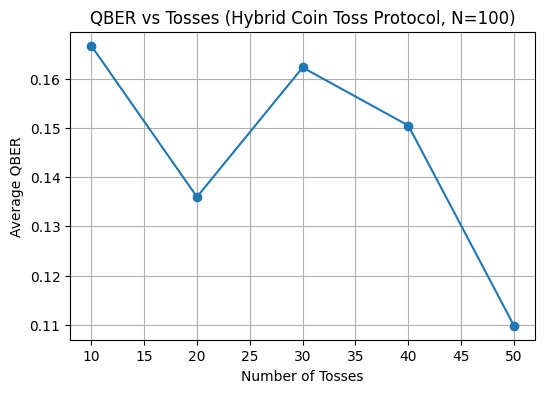

In [8]:
# hybrid_coin_qkd_stats.py
import numpy as np, random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, Qobj, mesolve

# -----------------------------
# Pauli operators
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# Gaussian pulse
sigma = 0.08
def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# =====================================================
# =============== BB84 FUNCTION =======================
# =====================================================
def run_bb84(N, seed=None):
    if seed is not None: random.seed(seed)
    n_steps = 50
    tlist = np.linspace(0, 1, n_steps)

    # Hamiltonian terms
    H_coup_01 = tensor(Y, X, I)
    H_coup_12 = tensor(I, Z, X)
    H_drive_0 = [tensor(X, I, I), lambda t, args: 1.0 * gaussian(t)]
    H_drive_1 = [tensor(I, X, I), lambda t, args: 1.0 * gaussian(t)]
    H = [H_coup_01 + H_coup_12, H_drive_0, H_drive_1]

    # States
    state_0, state_1 = basis(2,0), basis(2,1)
    state_plus  = (basis(2,0) + basis(2,1)).unit()
    state_minus = (basis(2,0) - basis(2,1)).unit()

    def evolve_three_qubit(state_q2):
        psi0 = tensor(basis(2,0), basis(2,0), state_q2)
        result = mesolve(H, psi0, tlist, [], [])
        return result.states[-1].ptrace(2)  # Alice's reduced state

    def measure_rho(rho, basis_choice):
        if basis_choice == "Z":
            P0 = state_0 * state_0.dag()
            return 0 if random.random() < np.real((P0 * rho).tr()) else 1
        else:  # X
            Pp = state_plus * state_plus.dag()
            return 0 if random.random() < np.real((Pp * rho).tr()) else 1

    alice_bits, alice_bases = [], []
    bob_bits, bob_bases = [], []
    for _ in range(N):
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)
        psi = state_0 if (basis_choice=="Z" and bit==0) else \
              state_1 if (basis_choice=="Z" and bit==1) else \
              state_plus if (basis_choice=="X" and bit==0) else state_minus
        rho_q2 = evolve_three_qubit(psi)
        bob_basis = random.choice(["Z","X"])
        bob_bases.append(bob_basis)
        bob_bits.append(measure_rho(rho_q2, bob_basis))

    common = [i for i in range(N) if alice_bases[i]==bob_bases[i]]
    sift_alice = [alice_bits[i] for i in common]
    sift_bob   = [bob_bits[i] for i in common]
    mismatches = sum(a!=b for a,b in zip(sift_alice, sift_bob))
    qber = mismatches / len(sift_alice) if sift_alice else 0.0
    return {"qber": qber, "key_length": len(sift_alice), "final_key": sift_alice,
            "mismatches": mismatches}


# =====================================================
# =============== GHZ FUNCTION ========================
# =====================================================
def run_ghz(N_trials, seed=None):
    if seed is not None:
        random.seed(seed); np.random.seed(seed)
    n_steps = 50
    tlist = np.linspace(0, 1, n_steps)

    def hadamard_qobj():
        return Qobj(np.array([[1,1],[1,-1]],dtype=complex)/np.sqrt(2))

    def cnot(control, target, N=3):
        P0_list=[basis(2,0)*basis(2,0).dag() if n==control else qeye(2) for n in range(N)]
        P1X_list=[]
        for n in range(N):
            if n==control: P1X_list.append(basis(2,1)*basis(2,1).dag())
            elif n==target: P1X_list.append(sigmax())
            else: P1X_list.append(qeye(2))
        return tensor(*P0_list)+tensor(*P1X_list)

    psi0 = tensor(basis(2,0), basis(2,0), basis(2,0))
    psi_ghz = cnot(0,2)*cnot(0,1)*tensor(hadamard_qobj(),I,I)*psi0

    # Hamiltonians
    H_coup_01 = tensor(Y,X,I)
    H_coup_12 = tensor(I,Z,X)
    H_static  = H_coup_01 + H_coup_12
    H_drive   = [tensor(X,I,I), lambda t,args: gaussian(t)]
    H_attack  = [H_static, H_drive]

    computational_states = [tensor(basis(2,i),basis(2,j),basis(2,k))
                            for i in [0,1] for j in [0,1] for k in [0,1]]
    proj_3qb=[s*s.dag() for s in computational_states]
    def comp_probs(rho): return np.array([float((rho*P).tr().real) for P in proj_3qb])

    no_attack_key, attack_key = [], []
    mismatch_count = 0
    for _ in range(N_trials):
        bases = tuple(random.choice(['X','Y']) for _ in range(3))
        psi_no  = mesolve([H_static], psi_ghz, tlist, [], []).states[-1]
        psi_att = mesolve(H_attack, psi_ghz, tlist, [], []).states[-1]

        rho_no, rho_att = psi_no*psi_no.dag(), psi_att*psi_att.dag()
        probs_no, probs_att = comp_probs(rho_no), comp_probs(rho_att)

        r=random.random()
        idx_no=int(np.searchsorted(np.cumsum(probs_no), r))
        idx_att=int(np.searchsorted(np.cumsum(probs_att), r))
        a_no,b_no,c_no=(idx_no>>2)&1,(idx_no>>1)&1,(idx_no>>0)&1
        a_att,b_att,c_att=(idx_att>>2)&1,(idx_att>>1)&1,(idx_att>>0)&1

        if bases==('Y','Y','Y'):
            if (a_no^b_no^c_no)==1: no_attack_key.append(a_no)
            if (a_att^b_att^c_att)==1: attack_key.append(a_att)
            if a_no!=a_att: mismatch_count+=1

    L=min(len(no_attack_key), len(attack_key))
    qber = sum(no_attack_key[i]!=attack_key[i] for i in range(L))/L if L>0 else 0.0
    return attack_key[:L], {"qber":qber, "key_length":L,
                            "final_key":attack_key[:L],
                            "mismatches": mismatch_count,
                            "collapses": len(attack_key)}


# =====================================================
# =============== COIN FLIP DRIVER ====================
# =====================================================
def coin_flip(num_tosses=10, N=100):
    final_keys=[]; qbers=[]
    bb84_count=ghz_count=0
    bb84_keys=ghz_keys=0
    bb84_mis=ghz_mis=0
    ghz_collapse=0

    for _ in range(num_tosses):
        a_flip=random.choice(['H','T'])
        b_flip=random.choice(['H','T'])
        if a_flip=='H' and b_flip=='H':
            res=run_bb84(N)
            qbers.append(res["qber"])
            bb84_count+=1; bb84_keys+=res["key_length"]; bb84_mis+=res["mismatches"]
            final_keys.extend(res["final_key"])
        elif a_flip=='T' and b_flip=='T':
            key,res=run_ghz(N_trials=N)
            qbers.append(res["qber"])
            ghz_count+=1; ghz_keys+=res["key_length"]; ghz_mis+=res["mismatches"]; ghz_collapse+=res["collapses"]
            final_keys.extend(res["final_key"])

    return {"final_keys":final_keys, "qbers":qbers,
            "bb84_count":bb84_count, "bb84_keys":bb84_keys, "bb84_mis":bb84_mis,
            "ghz_count":ghz_count, "ghz_keys":ghz_keys, "ghz_mis":ghz_mis,
            "ghz_collapse":ghz_collapse}


# =====================================================
# =============== MAIN LOOP + PLOTS ===================
# =====================================================
if __name__=="__main__":
    tosses=[10,20,30,40,50]
    avg_qbers=[]
    for t in tosses:
        stats=coin_flip(num_tosses=t, N=100)
        avg_qber=sum(stats["qbers"])/len(stats["qbers"]) if stats["qbers"] else 0
        avg_qbers.append(avg_qber)
        print(f"Tosses={t}, Avg QBER={avg_qber:.4f}")
        print(f"  BB84 runs={stats['bb84_count']} | Keys={stats['bb84_keys']} | Pulse mismatches={stats['bb84_mis']}")
        print(f"  GHZ runs={stats['ghz_count']} | Keys={stats['ghz_keys']} | Collapses={stats['ghz_collapse']} | Pulse mismatches={stats['ghz_mis']}")
        print(f"  Combined key length={len(stats['final_keys'])}")
        print("-"*60)

    # Plot QBER vs toss count
    plt.figure(figsize=(6,4))
    plt.plot(tosses, avg_qbers, marker='o')
    plt.xlabel("Number of Tosses")
    plt.ylabel("Average QBER")
    plt.title("QBER vs Tosses (Hybrid Coin Toss Protocol, N=100)")
    plt.grid(True)
    plt.show()

In [9]:
# hybrid_coin_qkd_tosses.py
import numpy as np, random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, Qobj, mesolve

# ---------------------------
# Pauli operators
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# ---------------------------
# Gaussian pulse
sigma = 0.08
def gaussian(t, t0=0.5, sigma=sigma):
    return np.exp(-((t - t0)**2) / (2 * sigma**2))

# Simulation timeline
n_steps = 50
tlist = np.linspace(0, 1, n_steps)

# ---------------------------
# Crosstalk + Eve drive Hamiltonians
J01 = 1.0; J12 = 1.0
A0 = 1.0; A1 = 1.0

H_coup_01 = tensor(Y, X, I)       # Y⊗X
H_coup_12 = tensor(I, Z, X)       # Z⊗X
H_drive_0 = [tensor(X, I, I), lambda t, args: A0 * gaussian(t)]
H_drive_1 = [tensor(I, X, I), lambda t, args: A1 * gaussian(t)]

H_attack = [J01 * H_coup_01 + J12 * H_coup_12, H_drive_0, H_drive_1]
H_noattack = [J01 * H_coup_01 + J12 * H_coup_12]

# =====================================================
# =============== BB84 PULSE ATTACK ===================
# =====================================================
state_0 = basis(2,0)
state_1 = basis(2,1)
state_plus  = (basis(2,0) + basis(2,1)).unit()
state_minus = (basis(2,0) - basis(2,1)).unit()

def evolve_three_qubit(state_q2, with_attack=True):
    psi0 = tensor(basis(2,0), basis(2,0), state_q2)
    H = H_attack if with_attack else H_noattack
    result = mesolve(H, psi0, tlist, [], [])
    return result.states[-1].ptrace(2)

def measure_rho(rho, basis_choice):
    if basis_choice == "Z":
        P0 = state_0 * state_0.dag()
        return 0 if random.random() < np.real((P0 * rho).tr()) else 1
    else:
        Pp = state_plus * state_plus.dag()
        return 0 if random.random() < np.real((Pp * rho).tr()) else 1

def run_bb84(N=100):
    alice_bits, alice_bases = [], []
    bob_bits_att, bob_bits_no = [], []
    mismatches = 0

    for _ in range(N):
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)

        psi = state_0 if (basis_choice=="Z" and bit==0) else \
              state_1 if (basis_choice=="Z" and bit==1) else \
              state_plus if (basis_choice=="X" and bit==0) else state_minus

        rho_att = evolve_three_qubit(psi, with_attack=True)
        rho_no  = evolve_three_qubit(psi, with_attack=False)

        bob_basis = random.choice(["Z","X"])
        b_att = measure_rho(rho_att, bob_basis)
        b_no  = measure_rho(rho_no, bob_basis)

        bob_bits_att.append(b_att)
        bob_bits_no.append(b_no)

        if b_att != b_no:
            mismatches += 1

    key_length = len(alice_bits) // 2   # approx sifted length
    qber = mismatches / key_length if key_length>0 else 0.0

    return {"qber": qber, "key_length": key_length,
            "mismatches": mismatches}

# =====================================================
# =============== GHZ PULSE ATTACK ====================
# =====================================================
def hadamard_qobj():
    return Qobj(np.array([[1,1],[1,-1]],dtype=complex)/np.sqrt(2))

def cnot(control, target, N=3):
    P0_list=[basis(2,0)*basis(2,0).dag() if n==control else qeye(2) for n in range(N)]
    P1X_list=[]
    for n in range(N):
        if n==control: P1X_list.append(basis(2,1)*basis(2,1).dag())
        elif n==target: P1X_list.append(sigmax())
        else: P1X_list.append(qeye(2))
    return tensor(*P0_list)+tensor(*P1X_list)

def make_ghz_state():
    psi0 = tensor(basis(2,0), basis(2,0), basis(2,0))
    return cnot(0,2)*cnot(0,1)*tensor(hadamard_qobj(),I,I)*psi0

def run_ghz(N_trials=100):
    psi_ghz = make_ghz_state()
    mismatches = 0
    collapses = 0
    key_bits = []

    computational_states = [tensor(basis(2,i), basis(2,j), basis(2,k))
                            for i in [0,1] for j in [0,1] for k in [0,1]]
    proj_3qb=[s*s.dag() for s in computational_states]
    def comp_probs(rho): return np.array([float((rho*P).tr().real) for P in proj_3qb])

    for _ in range(N_trials):
        psi_no  = mesolve(H_noattack, psi_ghz, tlist, [], []).states[-1]
        psi_att = mesolve(H_attack, psi_ghz, tlist, [], []).states[-1]
        rho_no, rho_att = psi_no*psi_no.dag(), psi_att*psi_att.dag()
        probs_no, probs_att = comp_probs(rho_no), comp_probs(rho_att)

        r=random.random()
        idx_no=int(np.searchsorted(np.cumsum(probs_no), r))
        idx_att=int(np.searchsorted(np.cumsum(probs_att), r))
        a_no,b_no,c_no=(idx_no>>2)&1,(idx_no>>1)&1,(idx_no>>0)&1
        a_att,b_att,c_att=(idx_att>>2)&1,(idx_att>>1)&1,(idx_att>>0)&1

        if (a_no,b_no,c_no)!=(a_att,b_att,c_att):
            mismatches+=1
        if (a_att^b_att^c_att)==1:
            collapses+=1
            key_bits.append(a_att)

    qber = mismatches/N_trials if N_trials>0 else 0.0
    return {"qber": qber, "key_length": len(key_bits),
            "mismatches": mismatches, "collapses": collapses}

# =====================================================
# =============== COIN TOSS DRIVER ====================
# =====================================================
def coin_flip(num_tosses=10, N=100):
    qbers=[]; bb84_count=ghz_count=0
    bb84_keys=ghz_keys=0; ghz_collapse=0

    for _ in range(num_tosses):
        a_flip=random.choice(['H','T'])
        b_flip=random.choice(['H','T'])
        if a_flip=='H' and b_flip=='H':
            res=run_bb84(N)
            qbers.append(res["qber"])
            bb84_count+=1; bb84_keys+=res["key_length"]
        elif a_flip=='T' and b_flip=='T':
            res=run_ghz(N)
            qbers.append(res["qber"])
            ghz_count+=1; ghz_keys+=res["key_length"]; ghz_collapse+=res["collapses"]

    combined=bb84_keys+ghz_keys
    avg_qber=sum(qbers)/len(qbers) if qbers else 0.0
    return {"avg_qber":avg_qber, "bb84_count":bb84_count, "bb84_keys":bb84_keys,
            "ghz_count":ghz_count, "ghz_keys":ghz_keys, "ghz_collapse":ghz_collapse,
            "combined":combined}

# =====================================================
# =============== MAIN LOOP ===========================
# =====================================================
if __name__=="__main__":
    tosses=[10,20,30,40,50]
    for t in tosses:
        stats=coin_flip(num_tosses=t, N=100)
        print(f"Tosses={t}, Avg QBER={stats['avg_qber']:.4f}")
        print(f"  BB84 runs={stats['bb84_count']} | Keys={stats['bb84_keys']}")
        print(f"  GHZ runs={stats['ghz_count']} | Keys={stats['ghz_keys']} | Collapses={stats['ghz_collapse']}")
        print(f"  Combined key length={stats['combined']}")
        print("-"*60)

Tosses=10, Avg QBER=0.2438
  BB84 runs=2 | Keys=100
  GHZ runs=6 | Keys=327 | Collapses=327
  Combined key length=427
------------------------------------------------------------
Tosses=20, Avg QBER=0.3733
  BB84 runs=4 | Keys=200
  GHZ runs=5 | Keys=269 | Collapses=269
  Combined key length=469
------------------------------------------------------------
Tosses=30, Avg QBER=0.2569
  BB84 runs=4 | Keys=200
  GHZ runs=9 | Keys=472 | Collapses=472
  Combined key length=672
------------------------------------------------------------
Tosses=40, Avg QBER=0.3923
  BB84 runs=6 | Keys=300
  GHZ runs=7 | Keys=374 | Collapses=374
  Combined key length=674
------------------------------------------------------------
Tosses=50, Avg QBER=0.4640
  BB84 runs=11 | Keys=550
  GHZ runs=9 | Keys=510 | Collapses=510
  Combined key length=1060
------------------------------------------------------------


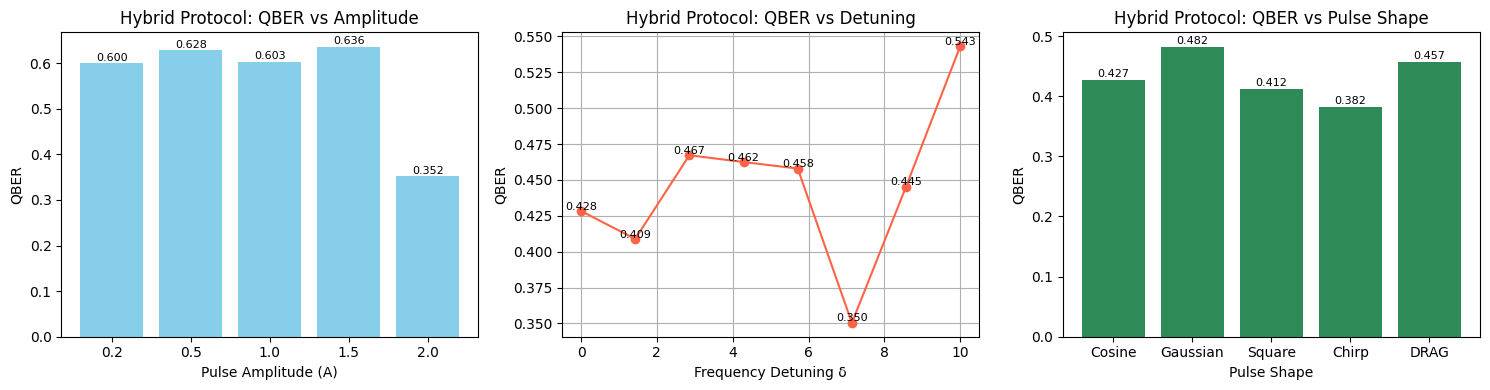

In [10]:
# Save as hybrid_coin_pulse_params.py
import numpy as np, random
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, Qobj, mesolve

# ---------------------------
# Pauli operators
X = sigmax(); Y = sigmay(); Z = sigmaz(); I = qeye(2)

# Timeline
n_steps = 50
tlist = np.linspace(0, 1, n_steps)

# Crosstalk couplings
J01, J12 = 1.0, 1.0

# ---------------------------
# Pulse shapes
def pulse_cosine(t, A=1.0, delta=0.0, **kwargs):
    return A * np.cos(delta * t)

def pulse_gaussian(t, A=1.0, sigma=0.08, **kwargs):
    return A * np.exp(-((t-0.5)**2) / (2*sigma**2))

def pulse_square(t, A=1.0, **kwargs):
    return A if 0.3 <= t <= 0.7 else 0.0

def pulse_chirp(t, A=1.0, delta=0.0, c=5.0, **kwargs):
    return A * np.cos((delta + c*t) * t)

def pulse_drag(t, A=1.0, sigma=0.08, alpha=2.0, **kwargs):
    return A * np.exp(-((t-0.5)**2) / (2*sigma**2) - alpha*((t-0.5)**2)/(sigma**2))

pulse_shapes = {
    "Cosine": pulse_cosine,
    "Gaussian": pulse_gaussian,
    "Square": pulse_square,
    "Chirp": pulse_chirp,
    "DRAG": pulse_drag
}

# ---------------------------
# BB84 States
state_0 = basis(2,0)
state_1 = basis(2,1)
state_plus  = (basis(2,0) + basis(2,1)).unit()
state_minus = (basis(2,0) - basis(2,1)).unit()

# ---------------------------
# BB84 under pulse
def evolve_three_qubit(state_q2, pulse_func, A=1.0, delta=0.0):
    H_coup_01 = tensor(Y, X, I)
    H_coup_12 = tensor(I, Z, X)
    H_drive_0 = [tensor(X, I, I), lambda t, args: pulse_func(t, A=A, delta=delta)]
    H_drive_1 = [tensor(I, X, I), lambda t, args: pulse_func(t, A=A, delta=delta)]
    H = [J01*H_coup_01 + J12*H_coup_12, H_drive_0, H_drive_1]
    psi0 = tensor(basis(2,0), basis(2,0), state_q2)
    result = mesolve(H, psi0, tlist, [], [])
    return result.states[-1].ptrace(2)

def measure_rho(rho, basis_choice):
    if basis_choice == "Z":
        P0 = state_0 * state_0.dag()
        return 0 if random.random() < np.real((P0 * rho).tr()) else 1
    else:
        Pp = state_plus * state_plus.dag()
        return 0 if random.random() < np.real((Pp * rho).tr()) else 1

def run_bb84(N=100, pulse_func=pulse_gaussian, A=1.0, delta=0.0):
    alice_bits, alice_bases = [], []
    bob_bits, bob_bases = [], []
    for _ in range(N):
        bit = random.randint(0,1)
        basis_choice = random.choice(["Z","X"])
        alice_bits.append(bit); alice_bases.append(basis_choice)
        psi = state_0 if (basis_choice=="Z" and bit==0) else \
              state_1 if (basis_choice=="Z" and bit==1) else \
              state_plus if (basis_choice=="X" and bit==0) else state_minus
        rho_q2 = evolve_three_qubit(psi, pulse_func, A=A, delta=delta)
        bob_basis = random.choice(["Z","X"])
        bob_bases.append(bob_basis)
        bob_bits.append(measure_rho(rho_q2, bob_basis))
    common = [i for i in range(N) if alice_bases[i]==bob_bases[i]]
    sift_a = [alice_bits[i] for i in common]
    sift_b = [bob_bits[i] for i in common]
    mismatches = sum(a!=b for a,b in zip(sift_a, sift_b))
    qber = mismatches/len(sift_a) if sift_a else 0.0
    return qber, len(sift_a)

# ---------------------------
# GHZ under pulse (simplified)
def make_ghz_state():
    H = Qobj(np.array([[1,1],[1,-1]])/np.sqrt(2))
    psi0 = tensor(basis(2,0), basis(2,0), basis(2,0))
    C01 = tensor(basis(2,0)*basis(2,0).dag()+basis(2,1)*basis(2,1).dag(), qeye(2), qeye(2)) \
         + tensor(basis(2,1)*basis(2,1).dag(), sigmax(), qeye(2))
    C02 = tensor(basis(2,0)*basis(2,0).dag()+basis(2,1)*basis(2,1).dag(), qeye(2), qeye(2)) \
         + tensor(basis(2,1)*basis(2,1).dag(), qeye(2), sigmax())
    return C02 * C01 * tensor(H, I, I) * psi0

def run_ghz(N=100, pulse_func=pulse_gaussian, A=1.0, delta=0.0):
    psi_ghz = make_ghz_state()
    H_coup_01 = tensor(Y,X,I); H_coup_12 = tensor(I,Z,X)
    H_drive_0 = [tensor(X,I,I), lambda t, args: pulse_func(t,A=A,delta=delta)]
    H_drive_1 = [tensor(I,X,I), lambda t, args: pulse_func(t,A=A,delta=delta)]
    H = [J01*H_coup_01+J12*H_coup_12, H_drive_0, H_drive_1]

    res = mesolve(H, psi_ghz, tlist, [], [])
    final = res.states[-1]

    # Convert to density matrix
    rho = final * final.dag()

    # Probability of collapse to |111>
    P111 = tensor(basis(2,1), basis(2,1), basis(2,1))
    proj111 = P111 * P111.dag()
    prob_111 = np.real((rho * proj111).tr())

    qber = 1 - prob_111
    return qber, int(prob_111 * N)


# ---------------------------
# Hybrid coin toss (10 tosses, N=100 each)
def coin_flip(num_tosses=10, pulse_func=pulse_gaussian, A=1.0, delta=0.0):
    qbers=[]; bb84_keys=ghz_keys=0
    for _ in range(num_tosses):
        flip = random.choice(["BB84","GHZ"])
        if flip=="BB84":
            q, k = run_bb84(N=100, pulse_func=pulse_func, A=A, delta=delta)
            qbers.append(q); bb84_keys+=k
        else:
            q, k = run_ghz(N=100, pulse_func=pulse_func, A=A, delta=delta)
            qbers.append(q); ghz_keys+=k
    return np.mean(qbers), bb84_keys, ghz_keys, bb84_keys+ghz_keys

# ---------------------------
# Parameter sweeps
A_values = [0.2,0.5,1.0,1.5,2.0]
qber_vs_amp = [coin_flip(10,pulse_func=pulse_gaussian,A=A)[0] for A in A_values]

delta_values = np.linspace(0,10,8)
qber_vs_delta = [coin_flip(10,pulse_func=pulse_cosine,delta=d)[0] for d in delta_values]

qber_vs_shape = {name: coin_flip(10,pulse_func=func)[0] for name,func in pulse_shapes.items()}

# ---------------------------
# Plotting
plt.figure(figsize=(15,4))

# QBER vs Amplitude
plt.subplot(1,3,1)
bars = plt.bar([str(a) for a in A_values], qber_vs_amp, color="skyblue")
plt.xlabel("Pulse Amplitude (A)"); plt.ylabel("QBER")
plt.title("Hybrid Protocol: QBER vs Amplitude")
for bar,val in zip(bars,qber_vs_amp):
    plt.text(bar.get_x()+bar.get_width()/2,val+0.001,f"{val:.3f}",
             ha='center',va='bottom',fontsize=8)

# QBER vs Detuning
plt.subplot(1,3,2)
plt.plot(delta_values, qber_vs_delta, marker='o', color="tomato")
plt.xlabel("Frequency Detuning δ"); plt.ylabel("QBER")
plt.title("Hybrid Protocol: QBER vs Detuning")
for x,y in zip(delta_values,qber_vs_delta):
    plt.text(x,y+0.001,f"{y:.3f}",ha='center',fontsize=8)
plt.grid(True)

# QBER vs Shape
plt.subplot(1,3,3)
bars = plt.bar(list(qber_vs_shape.keys()), list(qber_vs_shape.values()), color="seagreen")
plt.xlabel("Pulse Shape"); plt.ylabel("QBER")
plt.title("Hybrid Protocol: QBER vs Pulse Shape")
for bar,val in zip(bars,qber_vs_shape.values()):
    plt.text(bar.get_x()+bar.get_width()/2,val+0.001,f"{val:.3f}",
             ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()